LR, 𝑘NN, and SVM models using as few variables (pixels) to get as close as possible to the results in code_2.

In [1]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
import math
import matplotlib.pyplot as plt
import os


In [2]:
import numpy


gender = [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


 
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape




(400, 1)

In [3]:
from PIL import Image


folder = './images/'  # Updated folder path

def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder(folder)

pixels.shape


(400, 5600)

In [5]:
y = gender
X = pixels

Using LASSO reduce the size of data

finding & plotting down the important pixels

In [6]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001) 
lasso.fit(X, y)
n = np.sum(lasso.coef_ != 0)


pixels = []

for i in range(len(lasso.coef_)):
  if lasso.coef_[i] != 0: 
    pixels.append(i)

print(pixels)

[25, 30, 33, 34, 38, 42, 43, 44, 45, 56, 57, 82, 83, 86, 91, 92, 107, 108, 110, 113, 114, 117, 125, 126, 127, 149, 152, 172, 180, 189, 191, 204, 212, 213, 215, 219, 222, 229, 231, 232, 234, 242, 246, 247, 248, 254, 257, 258, 264, 285, 293, 294, 302, 304, 306, 307, 312, 322, 326, 328, 330, 334, 336, 354, 360, 361, 364, 377, 379, 382, 389, 390, 400, 409, 424, 427, 428, 433, 437, 438, 439, 440, 441, 444, 449, 450, 458, 460, 467, 479, 481, 482, 502, 503, 505, 506, 507, 508, 509, 513, 514, 515, 516, 517, 531, 532, 544, 547, 550, 551, 552, 561, 565, 566, 568, 574, 575, 578, 579, 587, 590, 602, 608, 613, 614, 621, 622, 631, 640, 643, 652, 653, 654, 662, 666, 680, 684, 685, 688, 693, 705, 706, 708, 709, 710, 713, 719, 730, 731, 733, 734, 735, 739, 753, 757, 760, 761, 765, 770, 773, 775, 780, 781, 782, 784, 786, 787, 788, 790, 791, 792, 793, 794, 795, 799, 800, 803, 804, 805, 809, 817, 822, 823, 826, 832, 835, 847, 850, 856, 857, 858, 860, 861, 865, 880, 882, 883, 887, 897, 900, 902, 905, 906, 

C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.465e-02, tolerance: 3.600e-03
  model = cd_fast.enet_coordinate_descent(


In [7]:
import math

x_pos = []
y_pos = []
width = 46

for pixel in pixels:
  y_posi = pixel//width 
  x_posi = (pixel - (width*y_posi)) + 1 
  x_pos.append(x_posi)
  y_pos.append(y_posi)

x_pos.append(46)
y_pos.append(56)

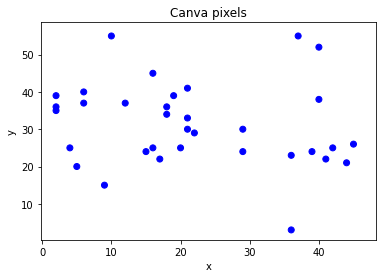

In [ ]:
import matplotlib.pyplot as plt

colors = []

for i in range(0,len(pixels)):
  colors.append("b")

colors.append("w")


plt.scatter(x_pos,y_pos, c=colors)

plt.title('Canva pixels')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

selecting important pixels

In [8]:
X_imp = np.zeros((400, len(pixels)))
X_imp = X.T[pixels]
X_imp = X_imp.T

split and normalize the training, testing dataset

In [9]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn import svm

In [10]:
X_imp_train, X_imp_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=1)


Logistic Regression

In [11]:
LR = LogisticRegression()
LR.fit(X_imp_train, y_train)
predictions_LR = LR.predict(X_imp_test)
print("LR predictions: ", predictions_LR)
print("LR accuracy using LASSO: ", 100* LR.score(X_imp_test, y_test),"%")

LR predictions:  [1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 1]
LR accuracy using LASSO:  95.0 %


C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


K-Nearest Neighbor

In [12]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_imp_train,y_train)
predictions_KNN = LR.predict(X_imp_test)
print("KNN predictions: ", predictions_KNN)
print("KNN accuracy using LASSO: ",100*KNN.score(X_imp_test, y_test),"%")

KNN predictions:  [1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 1]
KNN accuracy using LASSO:  95.0 %


C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Support Vector Machine

In [13]:
SVM = svm.SVC(kernel='linear',C=1)
SVM.fit(X_imp_train,y_train)
predictions_SVM = SVM.predict(X_imp_test)
print("SVM predictions: ", predictions_SVM)
print("SVM accuracy using LASSO: ",100*SVM.score(X_imp_test, y_test),"%")

SVM predictions:  [1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 1]
SVM accuracy using LASSO:  96.25 %


C:\Users\Drac3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Conclusion:

The predictions using LASSO were much better. We still have the problem of the biased introduced by an inequal dataset. However, by using LASSO, we could improve the results for this issue a bit. All three machine learning had better accuracy. 